# Setup

In [1]:
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

In [2]:
%run setup.ipynb 

# Training with augmentation

Now we've trained our model and assessed its performance on the feeder data... it's not the worst, but let's see if we can't make it a bit stronger by adding augmentations.

## Augmentation round 1

First, just gonna mess up the pictures a little - no sciency arguments for it other than intuitively trying to capture that the feeder images are more grainy and the birds are not always perfectly posed (hence the crop).

In [3]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation1 = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug1 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation1)
dataloader_train_aug1 = torch.utils.data.DataLoader(dataset_train_aug1, batch_size=8, shuffle=True, num_workers=4)

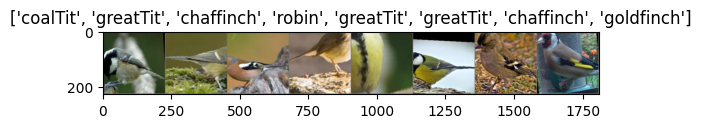

In [4]:
# looking at the augmentations..
inputs, classes = next(iter(dataloader_train_aug1))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_labels[x] for x in classes])

Load in a fresh ResNet50 that's prepped for transfer learning

In [5]:
# load "clean" resnet50
untrained_model_aug1 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug1) # FIXME does this change?

### Training
First with the frozen layers, then unfreeze for finetuning

In [6]:
freezetrained_model_aug1, freeze_aug1_info = train_model(model=untrained_model_aug1, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug1)

Epoch 1/40
----------
Train Loss: 1.8169 Acc: 0.4072
Val Loss: 1.6659 Acc: 0.7019
Epoch time 1m 10s
----------

Epoch 2/40
----------
Train Loss: 1.5087 Acc: 0.6623
Val Loss: 1.4115 Acc: 0.8269
Epoch time 1m 9s
----------

Epoch 3/40
----------
Train Loss: 1.2917 Acc: 0.7713
Val Loss: 1.2005 Acc: 0.8269
Epoch time 1m 9s
----------

Epoch 4/40
----------
Train Loss: 1.1621 Acc: 0.7749
Val Loss: 1.0651 Acc: 0.8173
Epoch time 1m 9s
----------

Epoch 5/40
----------
Train Loss: 1.0356 Acc: 0.8048
Val Loss: 0.9978 Acc: 0.8750
Epoch time 1m 9s
----------

Epoch 6/40
----------
Train Loss: 0.9627 Acc: 0.8180
Val Loss: 0.8735 Acc: 0.8654
Epoch time 1m 9s
----------

Epoch 7/40
----------
Train Loss: 0.9043 Acc: 0.8275
Val Loss: 0.8150 Acc: 0.8750
Epoch time 1m 9s
----------

Epoch 8/40
----------
Train Loss: 0.8444 Acc: 0.8527
Val Loss: 0.8086 Acc: 0.8846
Epoch time 1m 9s
----------

Epoch 9/40
----------
Train Loss: 0.8160 Acc: 0.8359
Val Loss: 0.7569 Acc: 0.8942
Epoch time 1m 9s
----------



In [7]:
unfreeze_layers(freezetrained_model_aug1)
model_aug1, model_aug1_info = train_model(model=freezetrained_model_aug1, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug1)

Epoch 1/40
----------
Train Loss: 0.3325 Acc: 0.9018
Val Loss: 0.1287 Acc: 0.9712
Epoch time 1m 52s
----------

Epoch 2/40
----------
Train Loss: 0.2353 Acc: 0.9317
Val Loss: 0.1094 Acc: 0.9808
Epoch time 1m 52s
----------

Epoch 3/40
----------
Train Loss: 0.2148 Acc: 0.9269
Val Loss: 0.1036 Acc: 0.9808
Epoch time 1m 52s
----------

Epoch 4/40
----------
Train Loss: 0.1595 Acc: 0.9509
Val Loss: 0.0604 Acc: 0.9904
Epoch time 1m 51s
----------

Epoch 5/40
----------
Train Loss: 0.1710 Acc: 0.9365
Val Loss: 0.0654 Acc: 0.9904
Epoch time 1m 51s
----------

Epoch 6/40
----------
Train Loss: 0.1515 Acc: 0.9497
Val Loss: 0.0745 Acc: 0.9808
Epoch time 1m 52s
----------

Epoch 7/40
----------
Train Loss: 0.0920 Acc: 0.9749
Val Loss: 0.0637 Acc: 0.9904
Epoch time 1m 51s
----------

Epoch 8/40
----------
Train Loss: 0.1067 Acc: 0.9701
Val Loss: 0.0679 Acc: 0.9904
Epoch time 1m 51s
----------

Epoch 9/40
----------
Train Loss: 0.0850 Acc: 0.9784
Val Loss: 0.0673 Acc: 0.9904
Epoch time 1m 51s
----

In [8]:
torch.save({"aug1": model_aug1.state_dict(), "aug1_info": model_aug1_info, "freeze_aug1_info": freeze_aug1_info},"aug1Model_40.tar")

### Round 1 results

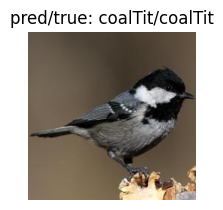

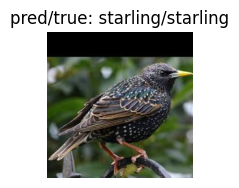

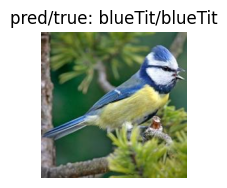

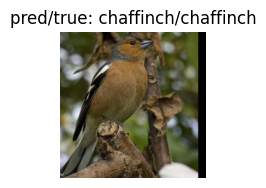

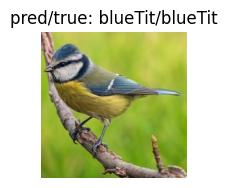

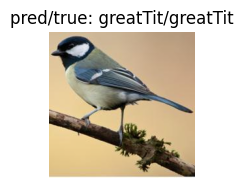

In [9]:
visualize_model(model_aug1, dataloader_tiny_val, class_labels, device)

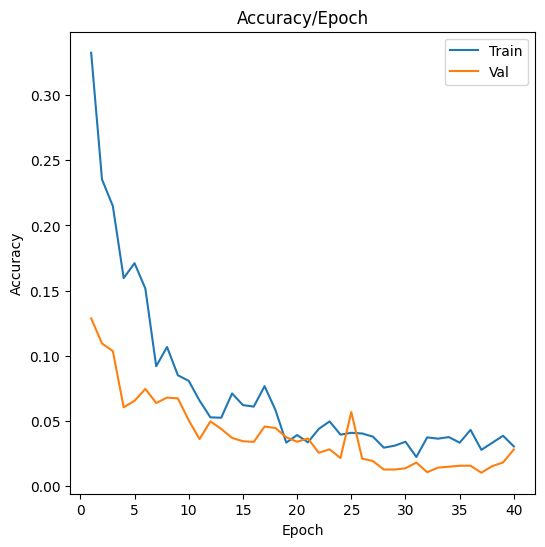

In [10]:
plot_accuracies(model_aug1_info["train_loss"], model_aug1_info["val_loss"], ["Train", "Val"])

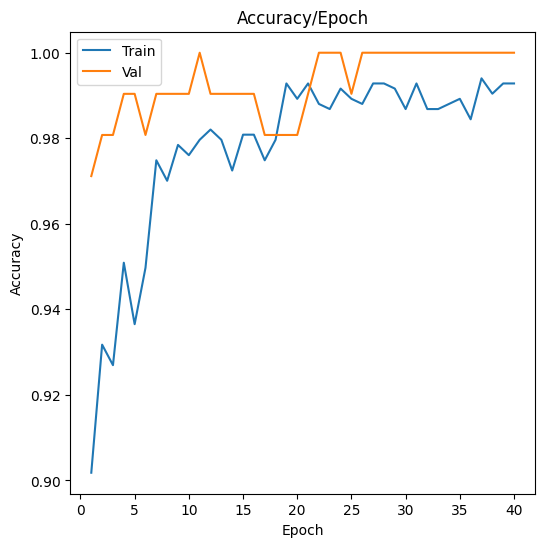

In [11]:
plot_accuracies(model_aug1_info["train_acc"], model_aug1_info["val_acc"], ["Train", "Val"])

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  1  0 14  0  0]
 [ 0  1  0  0  0 14  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 98.09523809523809


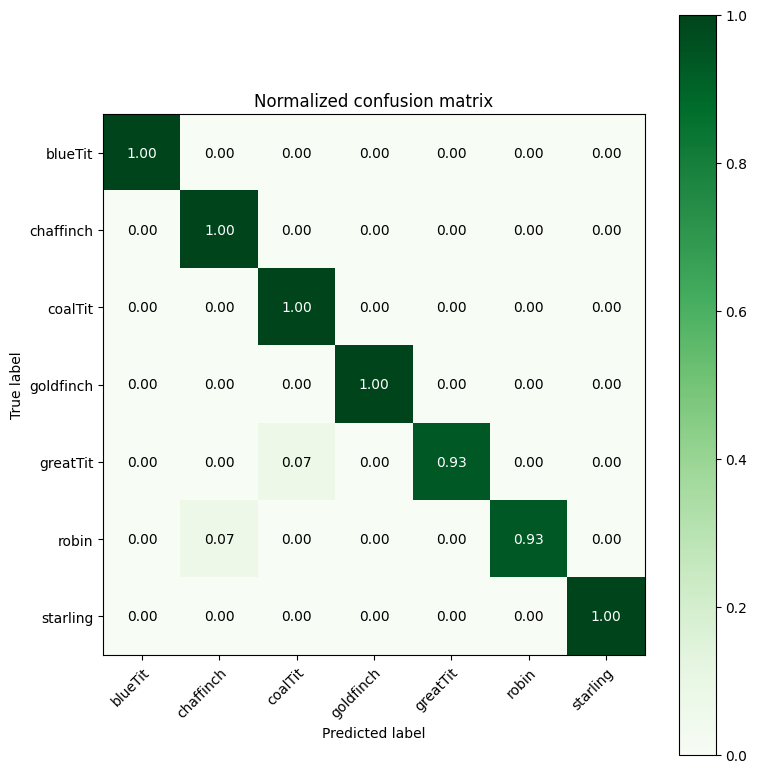

In [12]:
truel, predl = makeAll(dataloader_test, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


In [13]:
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       0.94      1.00      0.97        15
     coalTit       0.94      1.00      0.97        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.93      0.97        15
       robin       1.00      0.93      0.97        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



### On feeder

[[ 426    7    3   34 1427   48  133]
 [  14 2052   72  266  238  474  436]
 [   9    8  955  222  236  291  125]
 [   0   25    0 1954   19    2    0]
 [  43    3   40   20 1798   34   95]
 [   0  115    0   26   50  893  344]
 [   5    6    7   48   17  173 1886]]
Accuracy 66.07865243053253


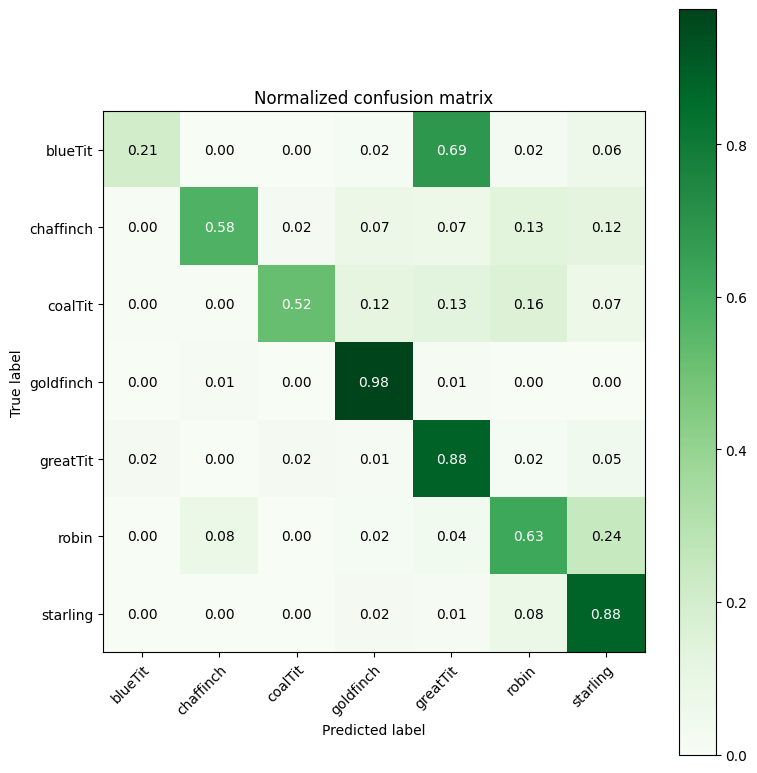

In [14]:
truel, predl = makeAll(dataloader_feeder, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


## Augmentation Round 2

Add blur and colorjitter

In [ ]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation2 = transforms.Compose([
    transforms.ColorJitter(brightness=0.1), # Added
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug2 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation2)
dataloader_train_aug2 = torch.utils.data.DataLoader(dataset_train_aug2, batch_size=8, shuffle=True, num_workers=4)

Load in a fresh ResNet50 that's prepped for transfer learning

In [ ]:
# load "clean" resnet50
untrained_model_aug2 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug2) 


### Training
First with the frozen layers, then unfreeze for finetuning

In [ ]:
freezetrained_model_aug2, freeze_aug2_info = train_model(model=untrained_model_aug2, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug2) 

In [ ]:
unfreeze_layers(freezetrained_model_aug2)
model_aug2, model_aug2_info = train_model(model=freezetrained_model_aug2, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug2)

In [ ]:
torch.save({"aug2": model_aug2.state_dict(), "aug2_info": model_aug2_info, "freeze_aug1_info": freeze_aug2_info},"aug2Model_40.tar")

### Round 2 Results

In [ ]:
visualize_model(model_aug2, dataloader_tiny_val, class_labels, device)

In [ ]:
plot_accuracies(model_aug2_info["train_loss"], model_aug2_info["val_loss"], ["Train", "Val"])

In [ ]:
plot_accuracies(model_aug2_info["train_acc"], model_aug2_info["val_acc"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug2, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [ ]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

### On feeder

In [ ]:
truel, predl = makeAll(dataloader_feeder, model_aug2, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

## Augmentation round 3

Try without jitter

In [ ]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation3 = transforms.Compose([
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug3 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation3)
dataloader_train_aug3 = torch.utils.data.DataLoader(dataset_train_aug3, batch_size=8, shuffle=True, num_workers=4)

Load in a fresh ResNet50 that's prepped for transfer learning

In [ ]:
# load "clean" resnet50
untrained_model_aug3 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug3) 

### Training
First with the frozen layers, then unfreeze for finetuning

In [ ]:
freezetrained_model_aug3, freeze_aug3_info = train_model(model=untrained_model_aug3, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug3) 

In [ ]:
unfreeze_layers(freezetrained_model_aug3)
model_aug3, model_aug3_info = train_model(model=freezetrained_model_aug3, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug3)

In [ ]:
torch.save({"aug3": model_aug3.state_dict(), "aug3_info": model_aug3_info, "freeze_aug3_info": freeze_aug3_info},"aug3Model_40.tar")

### Round 3 Results

In [ ]:
visualize_model(model_aug3, dataloader_tiny_val, class_labels, device)

In [ ]:
plot_accuracies(model_aug3_info["train_loss"], model_aug3_info["val_loss"], ["Train", "Val"])

In [ ]:
plot_accuracies(model_aug3_info["train_acc"], model_aug3_info["val_acc"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug3, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [ ]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

### On Feeder

In [ ]:
truel, predl = makeAll(dataloader_feeder, model_aug3, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))